In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\MITALI\Python_Files\Sugarcane_Production\List of Countries by Sugarcane Production.csv")

In [3]:
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [4]:
df.shape

(103, 7)

data cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.rename(columns={'Production (Tons)': 'Production(Tons)'}, inplace=True)
df.rename(columns={'Production per Person (Kg)': 'Production_per_Person(Kg)'}, inplace=True)
df.rename(columns={'Acreage (Hectare)': 'Acreage(Hectare)'}, inplace=True)
df.rename(columns={'Yield (Kg / Hectare)': 'Yield(Kg/Hectare)'}, inplace=True)
df.head()


,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [9]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df=df.dropna().reset_index()
df

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,11949.8


In [11]:
df.drop('index', axis=1)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [12]:
df.nunique()

index                        102
Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [13]:
df.dtypes

index                         int64
Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

how many countries produce sugarcane from each continent

<Axes: xlabel='Continent'>

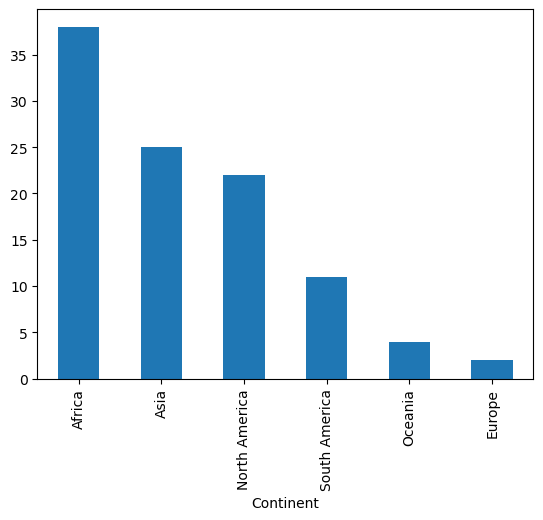

In [15]:
df['Continent'].value_counts().plot(kind="bar")

C:\Users\MITALI\AppData\Local\Temp\ipykernel_5404\2467860319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\MITALI\AppData\Local\Temp\ipykernel_5404\2467860319.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\Users\MITA

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

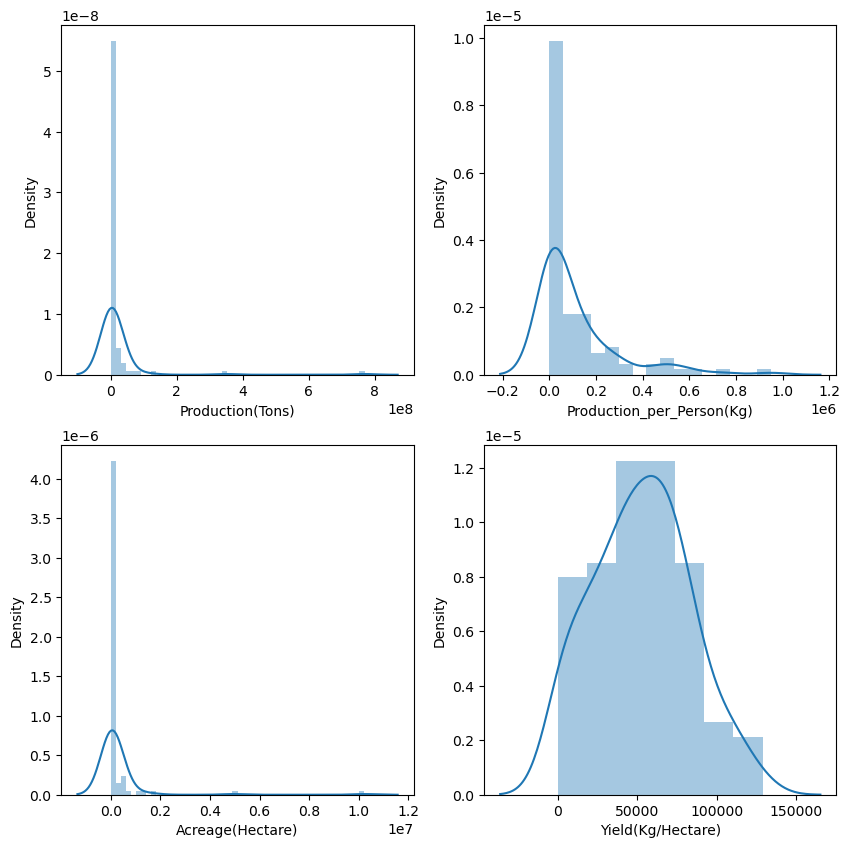

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

<Axes: >

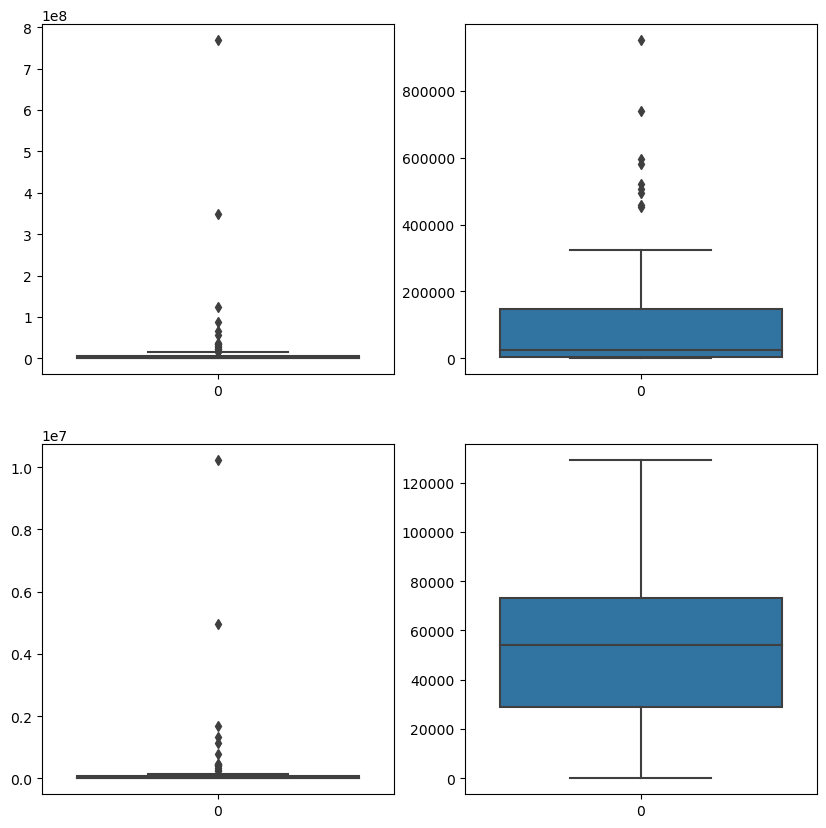

In [17]:
#cannot remove the outliers when the highest yield, highest acreage will get affected
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [18]:
df.describe()

,index,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,50.529412,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,29.638985,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,0.000000,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.250000,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,50.500000,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,75.750000,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129049.300000


which country produces maximum sugarcane?

In [19]:
df_new=df[['Country','Production(Tons)']].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [20]:
df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [21]:
df_new.sort_values(by="Production(Tons)", ascending=True)

,Production(Tons),Production(Tons)_percent
Country,,
Syria,1.0,5.298352e-08
Saint Lucia,10.0,5.298352e-07
Samoa,12.0,6.358022e-07
Singapore,50.0,2.649176e-06
Lebanon,97.0,5.139401e-06
...,...,...
Pakistan,65450704.0,3.467809e+00
Thailand,87468496.0,4.634389e+00
China,123059739.0,6.520138e+00


<Axes: ylabel='Production(Tons)_percent'>

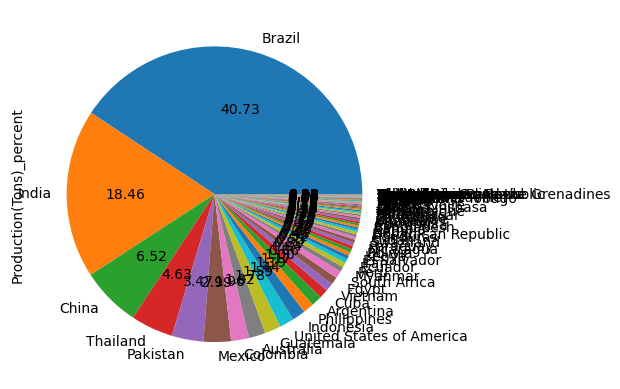

In [22]:
df_new['Production(Tons)_percent'].plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

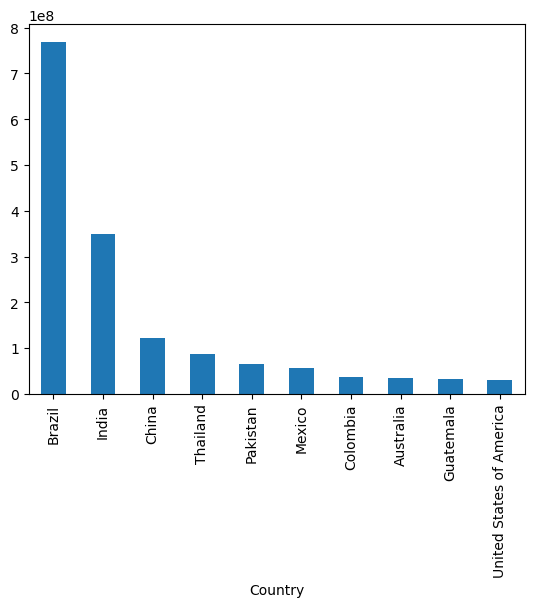

In [23]:
df_new['Production(Tons)'].head(10).plot(kind="bar")

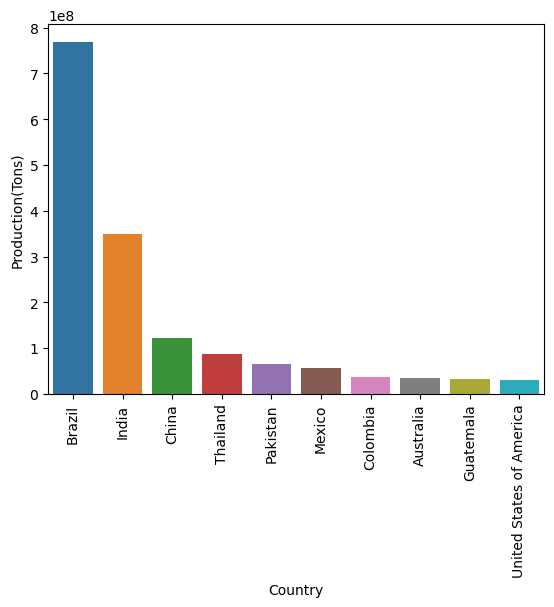

In [24]:
ax=sns.barplot(data=df.head(10), x="Country", y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

which country has the highest land

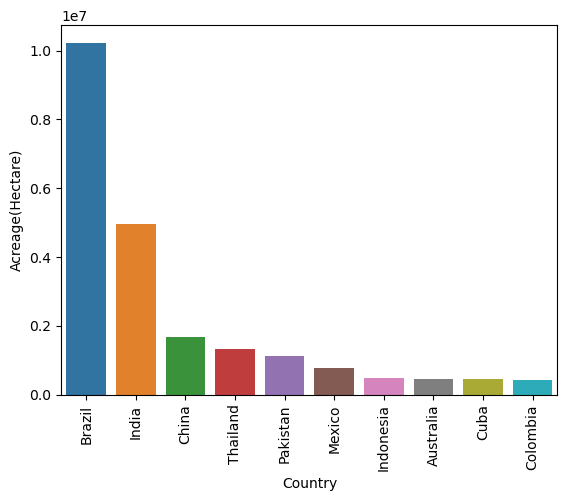

In [25]:
df_acr=df.sort_values(by="Acreage(Hectare)", ascending=False)
ax=sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

highest yield per hectare

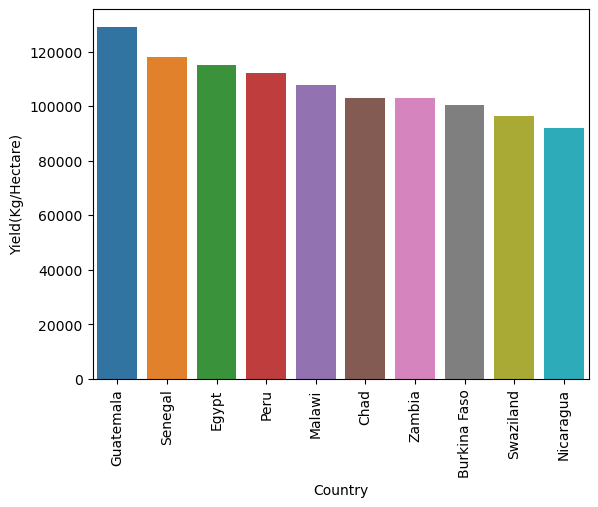

In [26]:
df_yield=df.sort_values(by="Yield(Kg/Hectare)", ascending=False)
ax=sns.barplot(data=df_yield.head(10), x="Country", y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

which country has highest production per person

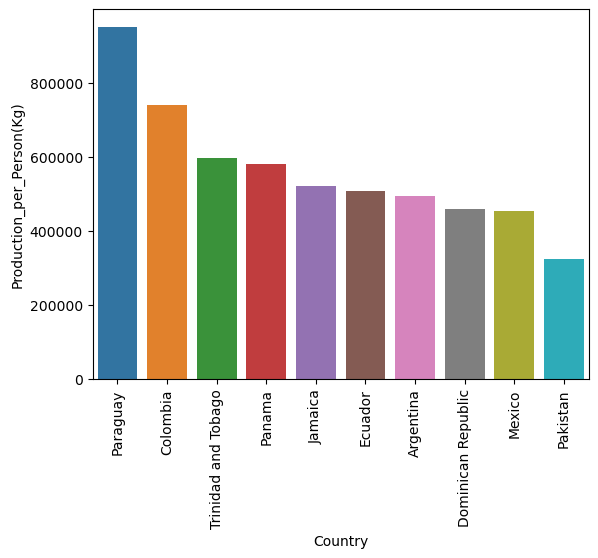

In [27]:
df_prod_per_person=df.sort_values(by="Production_per_Person(Kg)", ascending=False)
ax=sns.barplot(data=df_prod_per_person.head(10), x="Country", y="Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [29]:
#df.corr()

In [31]:
#sns.heatmap(data=df.corr(),annot=True, cmap="Greens")

##do countries with highest land produce more sugarcane 

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

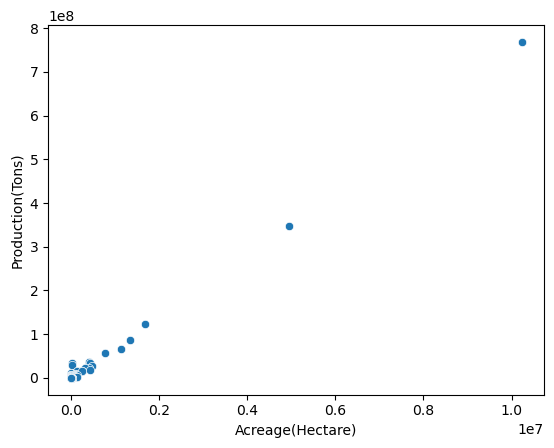

In [33]:
sns.scatterplot(data=df, x="Acreage(Hectare)", y="Production(Tons)")

##do countries which yield more sugarcane per hectare produce more sugarcane in total

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

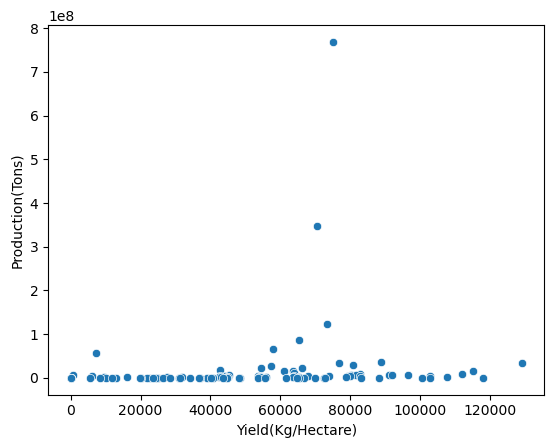

In [34]:
sns.scatterplot(data=df, x="Yield(Kg/Hectare)", y="Production(Tons)")
##no relationship

ANALYSIS OF CONTINENT

In [59]:
df_continent=df.groupby("Continent").sum()

In [58]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


In [45]:
df_continent.drop("index", axis=1, inplace=True)
df_continent.drop("Country", axis=1, inplace=True)

In [46]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


which continent produces the maximum sugarcane

In [ ]:
#how many countries in a continent
df['Continent'].value_counts()
#38 countries in Africa

<Axes: xlabel='Continent'>

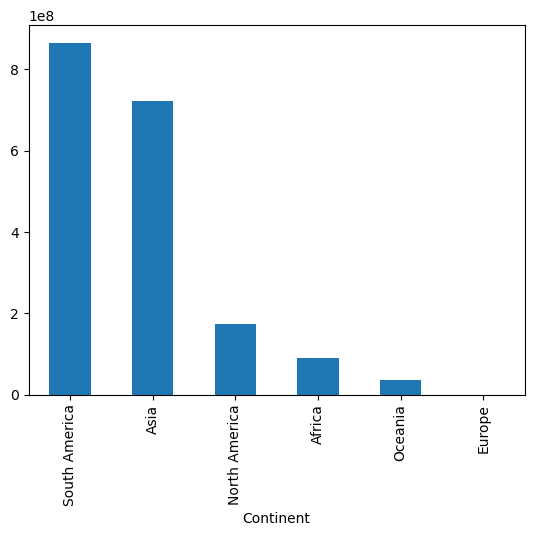

In [49]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

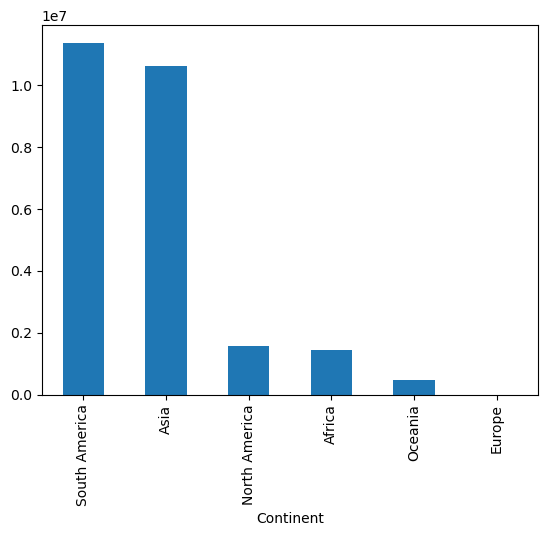

In [51]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind="bar")
#SA has highest land for production hence highest prodeuction

In [60]:
df_continent['number_of_countries']=df.groupby('Continent').count()['Country']

In [61]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


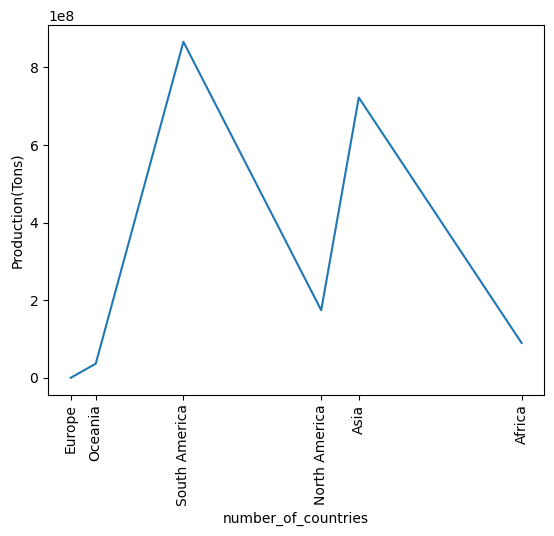

In [64]:
continent_name=df_continent.index.to_list()
continent_name
sns.lineplot(data=df_continent, x="number_of_countries", y="Production(Tons)")
plt.xticks(df_continent['number_of_countries'], continent_name, rotation=90)
plt.show()

In [65]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


prodcution distribution by continent

<Axes: ylabel='Production(Tons)'>

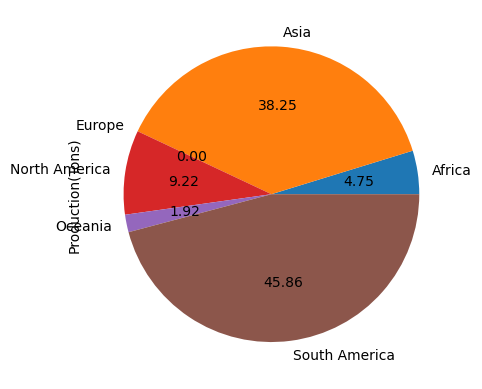

In [69]:
df_continent['Production(Tons)'].plot(kind="pie", autopct="%.2f")